In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from math import inf as int_inf
from collections import defaultdict

import utils

In [5]:
vertices_xyc = utils.G_3_tirs_perturbed
# vertices_xyc = utils.G_3_tirs
# vertices_xyc = utils.G_simple

In [6]:
import dataset2_comp1
vertices_xyc = dataset2_comp1.G_dataset3_comp644

In [7]:
components_c_xy = defaultdict(lambda: [])
for x, y, c in vertices_xyc:
    components_c_xy[c].append((x, y))
node_color = list(map(lambda x: x[2], vertices_xyc))
pos = {}
for i, xyc in enumerate(vertices_xyc):
    pos[i + 1] = xyc[:2]

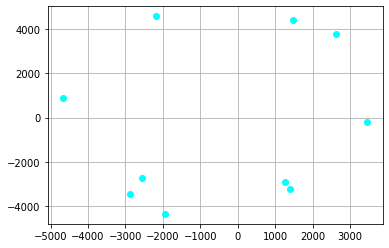

In [8]:
# plt.xlim([-1, 3])
# plt.ylim([-1, 11])
plt.grid()
for x, y, c in vertices_xyc:
    plt.plot(x, y, 'bo', color=c)

Create graphs and add their vertices to them

In [9]:
Components = [nx.Graph(color=color) for color in components_c_xy.keys()]

offset = 1
for G, ckey in zip(Components, components_c_xy.keys()):
    nodes = components_c_xy[ckey]
    for i, xy in enumerate(nodes, start=offset):
        G.add_node(i, pos=xy, color=ckey)
    offset += len(nodes)

Add edges

In [10]:
offset = 0
for G, ckey in zip(Components, components_c_xy.keys()):
    nodes = components_c_xy[ckey]
    for ii in range(len(nodes)):
        for jj in range(ii + 1, len(nodes)):
            i = ii + offset
            j = jj + offset
            u_xy = nodes[ii]
            v_xy = nodes[jj]
            d = utils.euclidian_dist(u_xy, v_xy)
            G.add_edge(i + 1, j + 1, weight=d)
    offset += len(nodes)

Create a graph that contains all components. It is only used for visualization purposes.

In [11]:
GAll = nx.compose_all(Components)

Gather node colors into a single list. This list is only used for `utils.draw_graph`.

In [12]:
G_node_color = list(map(lambda x: x[1]['color'], GAll.nodes(data=True)))

In [20]:
utils.draw_graph(GAll, pos=pos, node_color=G_node_color)

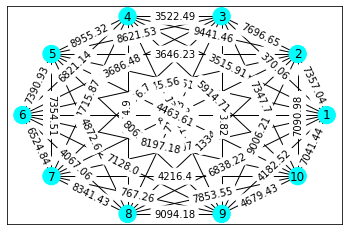

In [17]:
utils.draw_graph(GAll, node_color=G_node_color)

Run Floyd-Warshall for each component.

In [15]:
results = [(G.graph['color'], nx.floyd_warshall(G)) for G in Components]

For each component, find out it's capital and color it in gold.

In [16]:
capital = {}

offset = 1
for color, comp in results:
    max_min_dist = int_inf
    cap = None
    for node_idx in comp.keys():
        res_fw = comp[node_idx]
        dist = max(res_fw.values())
#         print(node_idx, 'cost:', dist)
        if max_min_dist > dist:
            max_min_dist = dist
            cap = node_idx
    offset += len(comp)
    capital[color] = cap
    GAll.nodes[cap]['color'] = 'gold'
#     print(f'capital for {color}: {cap}\n-------')

In [18]:
G_node_color = list(map(lambda x: x[1]['color'], GAll.nodes(data=True)))

{'aqua': 6}


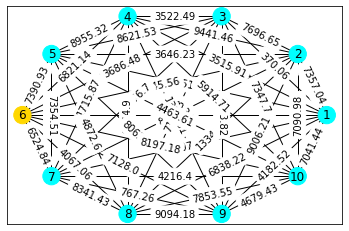

In [19]:
print(capital)
utils.draw_graph(GAll, node_color=G_node_color)

In [15]:
with open('phase1_c.ans', 'w') as fp:
    fp.write(json.dumps(capital))